# Assignment 3, Problem 1.

For this problem we will ask you to perform three tasks. 

1) Write functions that produce various $2 \times 2$ numpy matrices. 

    a) A function R that takes an argument t, which returns the matrix that performs counter-clockwise rotation by t radians. 
 
    b) A function M that takes an argument t, which returns the matrix that performs mirror-reflection across the line through the origin that has angle t with the x-axis. 
    
    c) A function S that takes an argument t, which returns the matrix that scales the x-coordinate by t, and leaves the y-coordinate fixed. 
    

In [12]:
import numpy as np
## returns CCW numpy rotation matrix, angle t in radians
def R(t):
    return np.matrix([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

## returns mirror reflection matrix.  We will use problem (2) as our definition, 
## i.e. M(t/2) = R(t) * M(0)^-1, but M(0)^-1 = M(0). 
def M(t): 
    return R(2*t)*np.matrix([[1, 0], [0,-1]])

## x-coordinate scale
def S(t):
    return np.matrix([[t, 0], [0,1]])
print(S(0).shape)
print(S(0)[0,0])

(2, 2)
0


2) Write a function that checks to see whether or not the identity 

$$M(t/2)M(0) = R(t)$$

is holds (if not, it should at least hold to **high degree of precision**), and check for at least $5$ different values of $t$ with $0 < t < \pi/2$. 

In [70]:
## let's create a function that checks if a matrix is "small"
## returns the sum of the squares of the entries of the matrix.
def smallMatrix(A):
    summ = 0.0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            summ += A[i,j]**2
    return summ
    
for i in range(5):
    t = i*np.pi/10
    checkMat = M(t/2)*M(0.0) - R(t)
    print(checkMat)
    print(smallMatrix(checkMat)<0.00000001)
    
## okay, all effectively zero.  So the identity holds. 

[[ 0.  0.]
 [ 0.  0.]]
True
[[ 0.  0.]
 [ 0.  0.]]
True
[[ 0.  0.]
 [ 0.  0.]]
True
[[ 0.  0.]
 [ 0.  0.]]
True
[[ 0.  0.]
 [ 0.  0.]]
True


3) Generate a plot of the function $y=\cos(x^2)$ in the plane, with $-1 \leq x \leq 3$.  Use matplotlib to plot it, together with a rotation and mirror reflection (choose a $0 < t < \pi/6$) and a scaling (with $t=1/3$).  Use different colours for the transformed graphs.

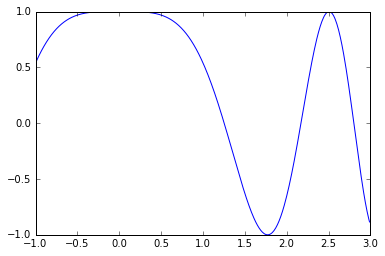

In [71]:
import matplotlib.pyplot as mpl
%matplotlib inline

x = np.arange(-1,3,0.01)
y = np.cos(x**2)

mpl.plot(x,y)

In [73]:
## let's make the x,y coordinates into a 2-dimensional numpy array. 
xy = np.array([x,y])
## this is something we can multiply with a 2x2 matrix.

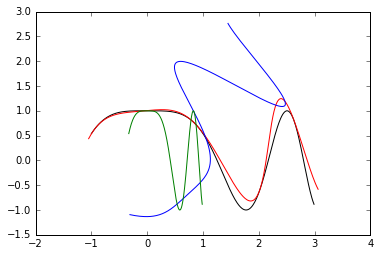

In [78]:
RotDat = R(0.1)*xy
MirDat = M(0.4)*xy
SclDat = S(0.33)*xy

## RotDat[0] has the information we want but python is thinking of it as a 1xn matrix.
## we use squeeze(asarray) to fix that
def SA(arr):
    return np.squeeze(np.asarray(arr))

mpl.plot(x,y,'k-', 
         SA(RotDat[0]), SA(RotDat[1]), 'r-', 
         SA(MirDat[0]), SA(MirDat[1]), 'b-', 
         SA(SclDat[0]), SA(SclDat[1]), 'g-')
